In [334]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import scipy
from sklearn import datasets
from sklearn import metrics
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from matplotlib.pyplot import figure
from sklearn.preprocessing import StandardScaler

In [335]:
#Create a path to where your data is stored.
path = r'D:\WORK\Bootcamp\Machine Learning\Achievement 1\Project\Data'

In [336]:
#Read in the European weather data.

# Read the CSV file
df = pd.read_csv(os.path.join(path, "Prepared", 'Data_scaled_v2.csv'))
df_ans = pd.read_csv(os.path.join(path, "Original", 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))

In [337]:
df.columns

Index(['Unnamed: 0', 'DATE', 'MONTH', 'BASEL_cloud_cover', 'BASEL_wind_speed',
       'BASEL_humidity', 'BASEL_pressure', 'BASEL_global_radiation',
       'BASEL_precipitation', 'BASEL_snow_depth',
       ...
       'VALENTIA_cloud_cover', 'VALENTIA_humidity', 'VALENTIA_pressure',
       'VALENTIA_global_radiation', 'VALENTIA_precipitation',
       'VALENTIA_snow_depth', 'VALENTIA_sunshine', 'VALENTIA_temp_mean',
       'VALENTIA_temp_min', 'VALENTIA_temp_max'],
      dtype='object', length=171)

In [338]:
df_ans.columns

Index(['DATE', 'BASEL_pleasant_weather', 'BELGRADE_pleasant_weather',
       'BUDAPEST_pleasant_weather', 'DEBILT_pleasant_weather',
       'DUSSELDORF_pleasant_weather', 'HEATHROW_pleasant_weather',
       'KASSEL_pleasant_weather', 'LJUBLJANA_pleasant_weather',
       'MAASTRICHT_pleasant_weather', 'MADRID_pleasant_weather',
       'MUNCHENB_pleasant_weather', 'OSLO_pleasant_weather',
       'SONNBLICK_pleasant_weather', 'STOCKHOLM_pleasant_weather',
       'VALENTIA_pleasant_weather'],
      dtype='object')

In [339]:
df_ans.head(10)

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,19600106,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,19600107,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,19600108,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,19600109,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,19600110,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [340]:
# Extract bases from df (columns ending with '_humidity')
bases_in_df = {col.split('_')[0] for col in df.columns if col.endswith('_humidity')}

# Extract bases from df_ans (columns ending with '_pleasant_weather')
bases_in_df_ans = {col.split('_')[0] for col in df_ans.columns if col.endswith('_pleasant_weather')}

# Find the missing "bases" in df_ans
missing_bases = bases_in_df - bases_in_df_ans

# Print the result
print("Missing bases in df_ans:", missing_bases)

Missing bases in df_ans: {'TOURS', 'ROMA', 'GDANSK'}


In [341]:
# Drop columns in df_ans that start with any missing base
columns_to_drop = [col for col in df.columns if any(col.startswith(base) for base in missing_bases)]

# Drop these columns from df_ans
df = df.drop(columns=columns_to_drop)

# Print confirmation
print(f"Columns dropped: {columns_to_drop}")

columns_to_drop

Columns dropped: ['GDANSK_cloud_cover', 'GDANSK_humidity', 'GDANSK_precipitation', 'GDANSK_snow_depth', 'GDANSK_temp_mean', 'GDANSK_temp_min', 'GDANSK_temp_max', 'ROMA_cloud_cover', 'ROMA_wind_speed', 'ROMA_humidity', 'ROMA_pressure', 'ROMA_sunshine', 'ROMA_temp_mean', 'TOURS_wind_speed', 'TOURS_humidity', 'TOURS_pressure', 'TOURS_global_radiation', 'TOURS_precipitation', 'TOURS_temp_mean', 'TOURS_temp_min', 'TOURS_temp_max']


['GDANSK_cloud_cover',
 'GDANSK_humidity',
 'GDANSK_precipitation',
 'GDANSK_snow_depth',
 'GDANSK_temp_mean',
 'GDANSK_temp_min',
 'GDANSK_temp_max',
 'ROMA_cloud_cover',
 'ROMA_wind_speed',
 'ROMA_humidity',
 'ROMA_pressure',
 'ROMA_sunshine',
 'ROMA_temp_mean',
 'TOURS_wind_speed',
 'TOURS_humidity',
 'TOURS_pressure',
 'TOURS_global_radiation',
 'TOURS_precipitation',
 'TOURS_temp_mean',
 'TOURS_temp_min',
 'TOURS_temp_max']

In [342]:
df.head(10)

,Unnamed: 0,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,0,19600101,-1.599964,0.660514,-0.02793,0.826097,-0.001949,-1.101066,-0.265148,-0.179228,...,-0.443701,0.761754,-1.299744,-0.806427,-0.088407,-0.024706,0.372147,-0.668215,-0.519743,-0.752237
1,1,19600102,-1.599964,0.244897,-0.02793,0.735760,-0.001949,-1.058108,1.658760,-0.179228,...,0.783085,1.183580,-1.262455,-1.042055,0.503361,-0.024706,-0.829285,-0.548046,-0.629054,-0.407141
2,2,19600103,-1.599964,1.076130,-0.02793,1.277781,-0.001949,-1.251420,0.155707,-0.179228,...,0.783085,1.183580,-0.432779,-1.136306,-0.396127,-0.024706,-1.009500,-0.067372,0.054135,-0.177078
3,3,19600104,-1.599964,-1.001953,-0.02793,1.458455,-0.001949,-0.821838,-0.445514,-0.179228,...,0.783085,0.480538,0.387574,-1.183432,0.669056,-0.024706,-1.039536,-0.998679,-0.164486,-0.838511
4,4,19600105,-1.599964,0.244897,-0.02793,1.729466,-0.001949,-0.746661,-0.164944,-0.179228,...,-1.670486,-0.363113,1.729970,-0.794645,-0.490810,-0.024706,0.672505,-1.509396,-1.339569,-1.471186
5,5,19600106,-1.599964,-1.833187,-0.02793,0.193738,-0.001949,-0.628526,-0.445514,-0.179228,...,-0.443701,-0.925546,1.711326,-0.947804,-0.490810,-0.024706,-0.769214,-1.990070,-2.323360,-1.384912
6,6,19600107,-1.599964,-1.001953,-0.02793,1.006770,-0.001949,-0.735921,-0.445514,-0.179228,...,0.783085,-1.347371,0.816395,-0.841771,-0.490810,-0.024706,-0.378748,-0.848468,-0.956984,-0.608447
7,7,19600108,-1.599964,1.076130,-0.02793,1.729466,-0.001949,-1.240680,-0.265148,-0.179228,...,-2.283879,-1.487980,0.564696,-0.747520,-0.490810,-0.024706,0.822684,-0.668215,-0.328451,-0.924785
8,8,19600109,-1.599964,1.076130,-0.02793,2.000476,-0.001949,-1.240680,0.676766,-0.179228,...,-0.443701,-2.191022,0.937583,-1.171651,-0.490810,-0.024706,-1.009500,-1.178932,-0.574398,-1.643734
9,9,19600110,-1.599964,-1.001953,-0.02793,-0.167609,-0.001949,-1.036629,-0.425473,2.313062,...,-2.897272,-2.331630,1.534204,-0.759301,-0.490810,-0.024706,0.882756,-2.681040,-2.104740,-2.448957


In [343]:
df

,Unnamed: 0,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,0,19600101,-1.599964,0.660514,-0.02793,0.826097,-0.001949,-1.101066,-0.265148,-0.179228,...,-0.443701,0.761754,-1.299744,-0.806427,-0.088407,-0.024706,0.372147,-0.668215,-0.519743,-0.752237
1,1,19600102,-1.599964,0.244897,-0.02793,0.735760,-0.001949,-1.058108,1.658760,-0.179228,...,0.783085,1.183580,-1.262455,-1.042055,0.503361,-0.024706,-0.829285,-0.548046,-0.629054,-0.407141
2,2,19600103,-1.599964,1.076130,-0.02793,1.277781,-0.001949,-1.251420,0.155707,-0.179228,...,0.783085,1.183580,-0.432779,-1.136306,-0.396127,-0.024706,-1.009500,-0.067372,0.054135,-0.177078
3,3,19600104,-1.599964,-1.001953,-0.02793,1.458455,-0.001949,-0.821838,-0.445514,-0.179228,...,0.783085,0.480538,0.387574,-1.183432,0.669056,-0.024706,-1.039536,-0.998679,-0.164486,-0.838511
4,4,19600105,-1.599964,0.244897,-0.02793,1.729466,-0.001949,-0.746661,-0.164944,-0.179228,...,-1.670486,-0.363113,1.729970,-0.794645,-0.490810,-0.024706,0.672505,-1.509396,-1.339569,-1.471186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,22945,20221027,1.013583,-1.833187,-0.02793,0.284075,1.037367,-0.005632,-0.004619,-0.179228,...,-0.443701,-0.081896,-0.003958,-0.005290,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.004530
22946,22946,20221028,1.013583,0.244897,-0.02793,0.103401,0.976231,-0.005632,-0.004619,-0.179228,...,-0.443701,-0.081896,-0.003958,-0.005290,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.004530
22947,22947,20221029,1.013583,-0.586336,-0.02793,0.013064,0.716402,-0.005632,-0.004619,-0.179228,...,-0.443701,-0.081896,-0.003958,-0.005290,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.004530
22948,22948,20221030,1.013583,-0.170720,-0.02793,0.374412,0.487141,-0.005632,-0.004619,-0.179228,...,-0.443701,-0.081896,-0.003958,-0.005290,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.004530


In [344]:
# Filter columns that end with '_temp_mean' or are 'DATE' or 'MONTH'
columns_to_keep = [col for col in df.columns if col.endswith('_temp_mean') or col in ['DATE', 'MONTH']]
df = df[columns_to_keep]

# Print the remaining columns
print("Remaining columns:", df.columns.tolist())

Remaining columns: ['DATE', 'MONTH', 'BASEL_temp_mean', 'BELGRADE_temp_mean', 'BUDAPEST_temp_mean', 'DEBILT_temp_mean', 'DUSSELDORF_temp_mean', 'HEATHROW_temp_mean', 'KASSEL_temp_mean', 'LJUBLJANA_temp_mean', 'MAASTRICHT_temp_mean', 'MADRID_temp_mean', 'MUNCHENB_temp_mean', 'OSLO_temp_mean', 'SONNBLICK_temp_mean', 'STOCKHOLM_temp_mean', 'VALENTIA_temp_mean']


In [345]:
df

,DATE,MONTH,BASEL_temp_mean,BELGRADE_temp_mean,BUDAPEST_temp_mean,DEBILT_temp_mean,DUSSELDORF_temp_mean,HEATHROW_temp_mean,KASSEL_temp_mean,LJUBLJANA_temp_mean,MAASTRICHT_temp_mean,MADRID_temp_mean,MUNCHENB_temp_mean,OSLO_temp_mean,SONNBLICK_temp_mean,STOCKHOLM_temp_mean,VALENTIA_temp_mean
0,19600101,-1.599964,-0.528623,-1.016876,-1.099163,-0.114356,-0.105836,-0.106469,-0.182904,-1.370824,-0.097084,-0.988280,-0.265742,-0.186575,-0.124331,-0.391072,-0.668215
1,19600102,-1.599964,-0.582946,-1.107669,-1.110927,-0.367511,-0.370915,-0.892676,-0.212437,-1.043881,-0.232112,-0.691740,-0.353714,-0.368598,-0.650834,-0.415953,-0.548046
2,19600103,-1.599964,-0.257010,-1.084971,-1.063873,-0.509912,-0.532908,-0.490837,-0.389635,-0.741156,-0.487164,-0.853490,-0.403983,-0.550620,-0.650834,-0.615003,-0.067372
3,19600104,-1.599964,-0.555784,-1.209812,-1.146217,-0.525734,-0.577088,-0.316124,-0.493001,-0.910682,-0.472161,-0.624345,-0.642763,-0.417137,-0.943336,-0.764290,-0.998679
4,19600105,-1.599964,-1.003946,-1.209812,-1.087400,-0.320045,-0.444548,-0.403481,-0.552067,-0.862246,-0.307127,-0.381721,-0.906678,-0.332193,-0.621584,-0.503037,-1.509396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,1.013583,0.747959,0.628750,-0.005167,0.898267,1.042841,0.906865,-0.005705,0.481853,1.268193,0.683127,0.664244,0.395898,0.826301,0.517090,-0.007287
22946,20221028,1.013583,0.856604,0.367720,-0.005167,0.945734,1.278467,0.802037,-0.005705,0.263891,1.313202,0.561815,0.890456,0.541516,1.074927,0.641496,-0.007287
22947,20221029,1.013583,0.856604,0.083991,-0.005167,0.914089,1.101748,0.924336,-0.005705,0.300218,1.208181,0.548336,1.053832,0.395898,1.221178,0.716139,-0.007287
22948,20221030,1.013583,0.680055,0.265577,-0.005167,0.692578,0.880848,0.697210,-0.005705,0.397090,0.923123,0.103526,0.689378,-0.065226,1.235803,0.019467,-0.007287


In [346]:
df_ans

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22946,20221028,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22947,20221029,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22948,20221030,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [347]:
# Find the number of unique values in each column
unique_counts = df_ans.nunique()

# Display the result
print(unique_counts)


DATE                           22950
BASEL_pleasant_weather             2
BELGRADE_pleasant_weather          2
BUDAPEST_pleasant_weather          2
DEBILT_pleasant_weather            2
DUSSELDORF_pleasant_weather        2
HEATHROW_pleasant_weather          2
KASSEL_pleasant_weather            2
LJUBLJANA_pleasant_weather         2
MAASTRICHT_pleasant_weather        2
MADRID_pleasant_weather            2
MUNCHENB_pleasant_weather          2
OSLO_pleasant_weather              2
SONNBLICK_pleasant_weather         1
STOCKHOLM_pleasant_weather         2
VALENTIA_pleasant_weather          2
dtype: int64


In [348]:
# Find the unique values in each column
unique_values = {col: df_ans[col].unique() for col in df_ans.columns}

# Display the unique values
for column, values in unique_values.items():
    print(f"Column '{column}': {values}")


Column 'DATE': [19600101 19600102 19600103 ... 20221029 20221030 20221031]
Column 'BASEL_pleasant_weather': [0 1]
Column 'BELGRADE_pleasant_weather': [0 1]
Column 'BUDAPEST_pleasant_weather': [0 1]
Column 'DEBILT_pleasant_weather': [0 1]
Column 'DUSSELDORF_pleasant_weather': [0 1]
Column 'HEATHROW_pleasant_weather': [0 1]
Column 'KASSEL_pleasant_weather': [0 1]
Column 'LJUBLJANA_pleasant_weather': [0 1]
Column 'MAASTRICHT_pleasant_weather': [0 1]
Column 'MADRID_pleasant_weather': [0 1]
Column 'MUNCHENB_pleasant_weather': [0 1]
Column 'OSLO_pleasant_weather': [0 1]
Column 'SONNBLICK_pleasant_weather': [0]
Column 'STOCKHOLM_pleasant_weather': [0 1]
Column 'VALENTIA_pleasant_weather': [0 1]


In [349]:
# Find rows with 1 in each column
rows_with_1 = df_ans[df_ans.eq(1).all(axis=1)]

# Display the result
print(rows_with_1)


Empty DataFrame
Columns: [DATE, BASEL_pleasant_weather, BELGRADE_pleasant_weather, BUDAPEST_pleasant_weather, DEBILT_pleasant_weather, DUSSELDORF_pleasant_weather, HEATHROW_pleasant_weather, KASSEL_pleasant_weather, LJUBLJANA_pleasant_weather, MAASTRICHT_pleasant_weather, MADRID_pleasant_weather, MUNCHENB_pleasant_weather, OSLO_pleasant_weather, SONNBLICK_pleasant_weather, STOCKHOLM_pleasant_weather, VALENTIA_pleasant_weather]
Index: []


# Mapping Pleasent and Unpleasent

In [350]:
#map each iris species number to a name with a dictionary.
#weather_class = {0:'Pleasent', 1:'Unpleasent'}
#df['species_name'] = [iris_class[i] for i in df_iris.species]

In [351]:
#df_iris

In [352]:
#subset for plotting the petal data
#columns = ['petal_length', 'petal_width', 'species_name']
#df2 = df_iris[columns]

In [353]:
#df2

In [354]:
#sns.set_theme()
#g = sns.catplot(x="petal_length", y="petal_width", hue="species_name", palette='Set1', data=df2)
#g.set_xticklabels(rotation=90)

In [355]:
#sns.pairplot(df_iris[['species', 'sepal_length', 'sepal_width', 'petal_length', 'petal_width']], hue = 'species')
#plt.show()

# Running Decision Tree

In [356]:
#Create an 'X' and y df by dropping the unneeded columns.
X = df.drop(['DATE', 'MONTH'], axis=1)
y = df_ans.drop(['DATE'],axis=1)

In [357]:
print(X.shape)
print(y.shape)

(22950, 15)
(22950, 15)


In [358]:
#Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=37)

In [359]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17212, 15)
(5738, 15)
(17212, 15)
(5738, 15)


In [360]:
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [361]:
#converting df to numpy array
#X_test = np.array(X_test) 
#X_train = np.array(X_train)

[Text(0.366247958030123, 0.984375, 'x[8] <= 0.391\ngini = 0.314\nsamples = 17212\nvalue = [[12978, 4234]\n[11216, 5996]\n[11633, 5579]\n[13890, 3322]\n[13531, 3681]\n[13498, 3714]\n[14436, 2776]\n[12426, 4786]\n[13646, 3566]\n[9516, 7696]\n[13642, 3570]\n[14566, 2646]\n[17212, 0]\n[14295, 2917]\n[16349, 863]]'),
 Text(0.11490065584244274, 0.953125, 'x[9] <= -0.281\ngini = 0.102\nsamples = 10625\nvalue = [[9984.0, 641.0]\n[9018.0, 1607.0]\n[9426.0, 1199.0]\n[10469.0, 156.0]\n[10299.0, 326.0]\n[10008.0, 617.0]\n[10448.0, 177.0]\n[9753.0, 872.0]\n[10438.0, 187.0]\n[8040.0, 2585.0]\n[10241.0, 384.0]\n[10411.0, 214.0]\n[10625.0, 0.0]\n[10410.0, 215.0]\n[10465.0, 160.0]]'),
 Text(0.050376553102786305, 0.921875, 'x[2] <= 0.071\ngini = 0.037\nsamples = 7509\nvalue = [[7374, 135]\n[6843, 666]\n[7140, 369]\n[7466, 43]\n[7420, 89]\n[7444, 65]\n[7443, 66]\n[7277, 232]\n[7453, 56]\n[7277, 232]\n[7347, 162]\n[7470, 39]\n[7509, 0]\n[7470, 39]\n[7496, 13]]'),
 Text(0.02977983089999104, 0.890625, 'x[1]

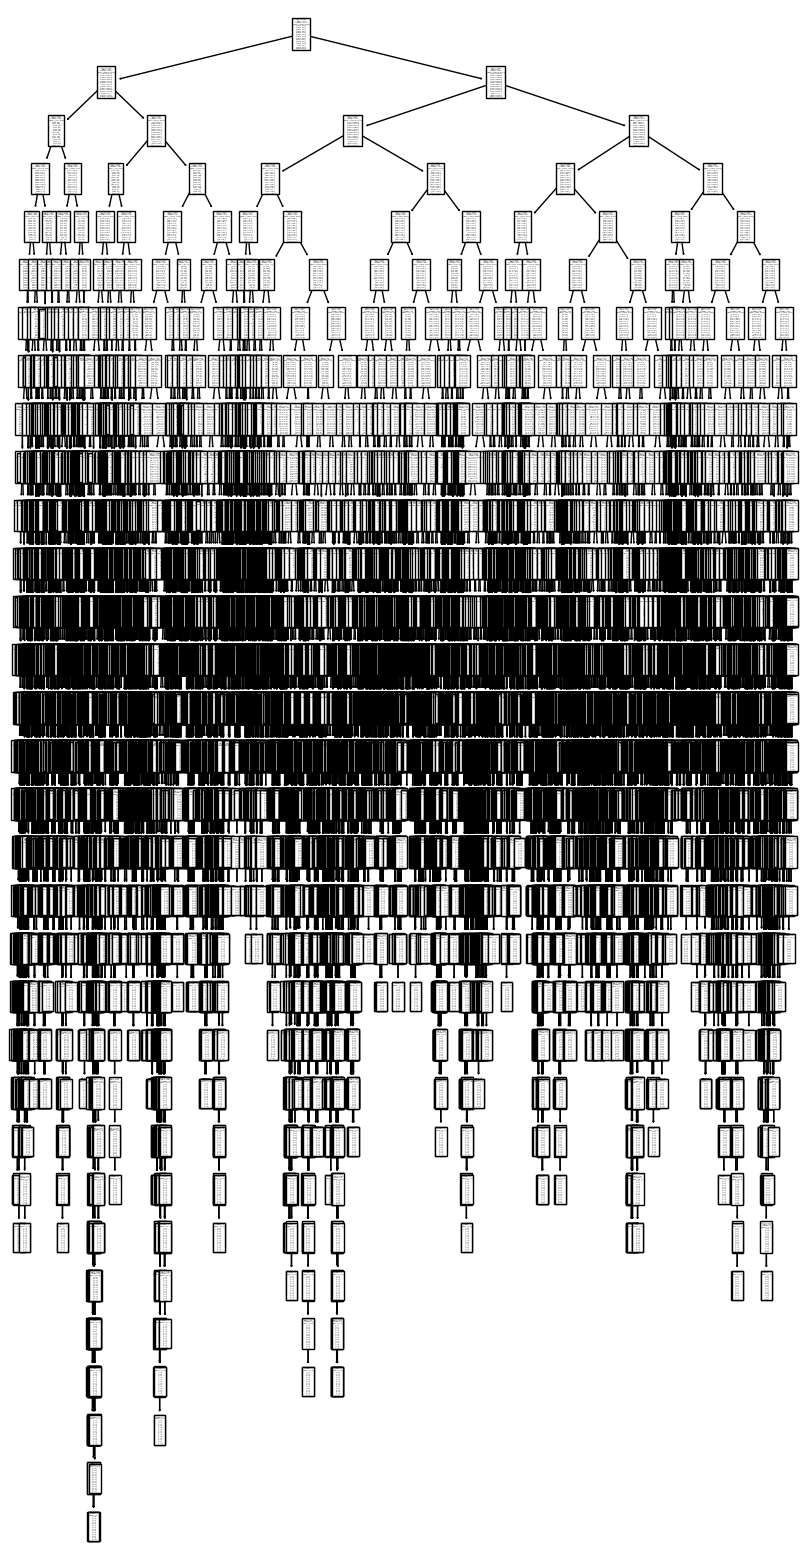

In [362]:
#Run Decision Tree classifier
dt = DecisionTreeClassifier(criterion='gini', min_samples_split=2)
dt.fit(X_train, y_train)
figure(figsize=(10,20))
tree.plot_tree(dt)

In [363]:
#What is the training accuracy score? Using the cross validation method
y_pred_train = dt.predict(X_train)
print('Train accuracy score: ',cross_val_score(dt, X_train, y_train, cv = 3, scoring='accuracy').mean())

Train accuracy score:  0.40053430086649905


In [364]:
from sklearn.metrics import classification_report

report = classification_report(y_train, y_pred_train)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4234
           1       1.00      1.00      1.00      5996
           2       1.00      1.00      1.00      5579
           3       1.00      1.00      1.00      3322
           4       1.00      1.00      1.00      3681
           5       1.00      1.00      1.00      3714
           6       1.00      1.00      1.00      2776
           7       1.00      1.00      1.00      4786
           8       1.00      1.00      1.00      3566
           9       1.00      1.00      1.00      7696
          10       1.00      1.00      1.00      3570
          11       1.00      1.00      1.00      2646
          12       0.00      0.00      0.00         0
          13       1.00      1.00      1.00      2917
          14       1.00      1.00      1.00       863

   micro avg       1.00      1.00      1.00     55346
   macro avg       0.93      0.93      0.93     55346
weighted avg       1.00   

c:\Users\Oa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Oa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Oa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Oa\anaconda3\Lib\site-packages\sklearn\me

# Matrix

c:\Users\Oa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


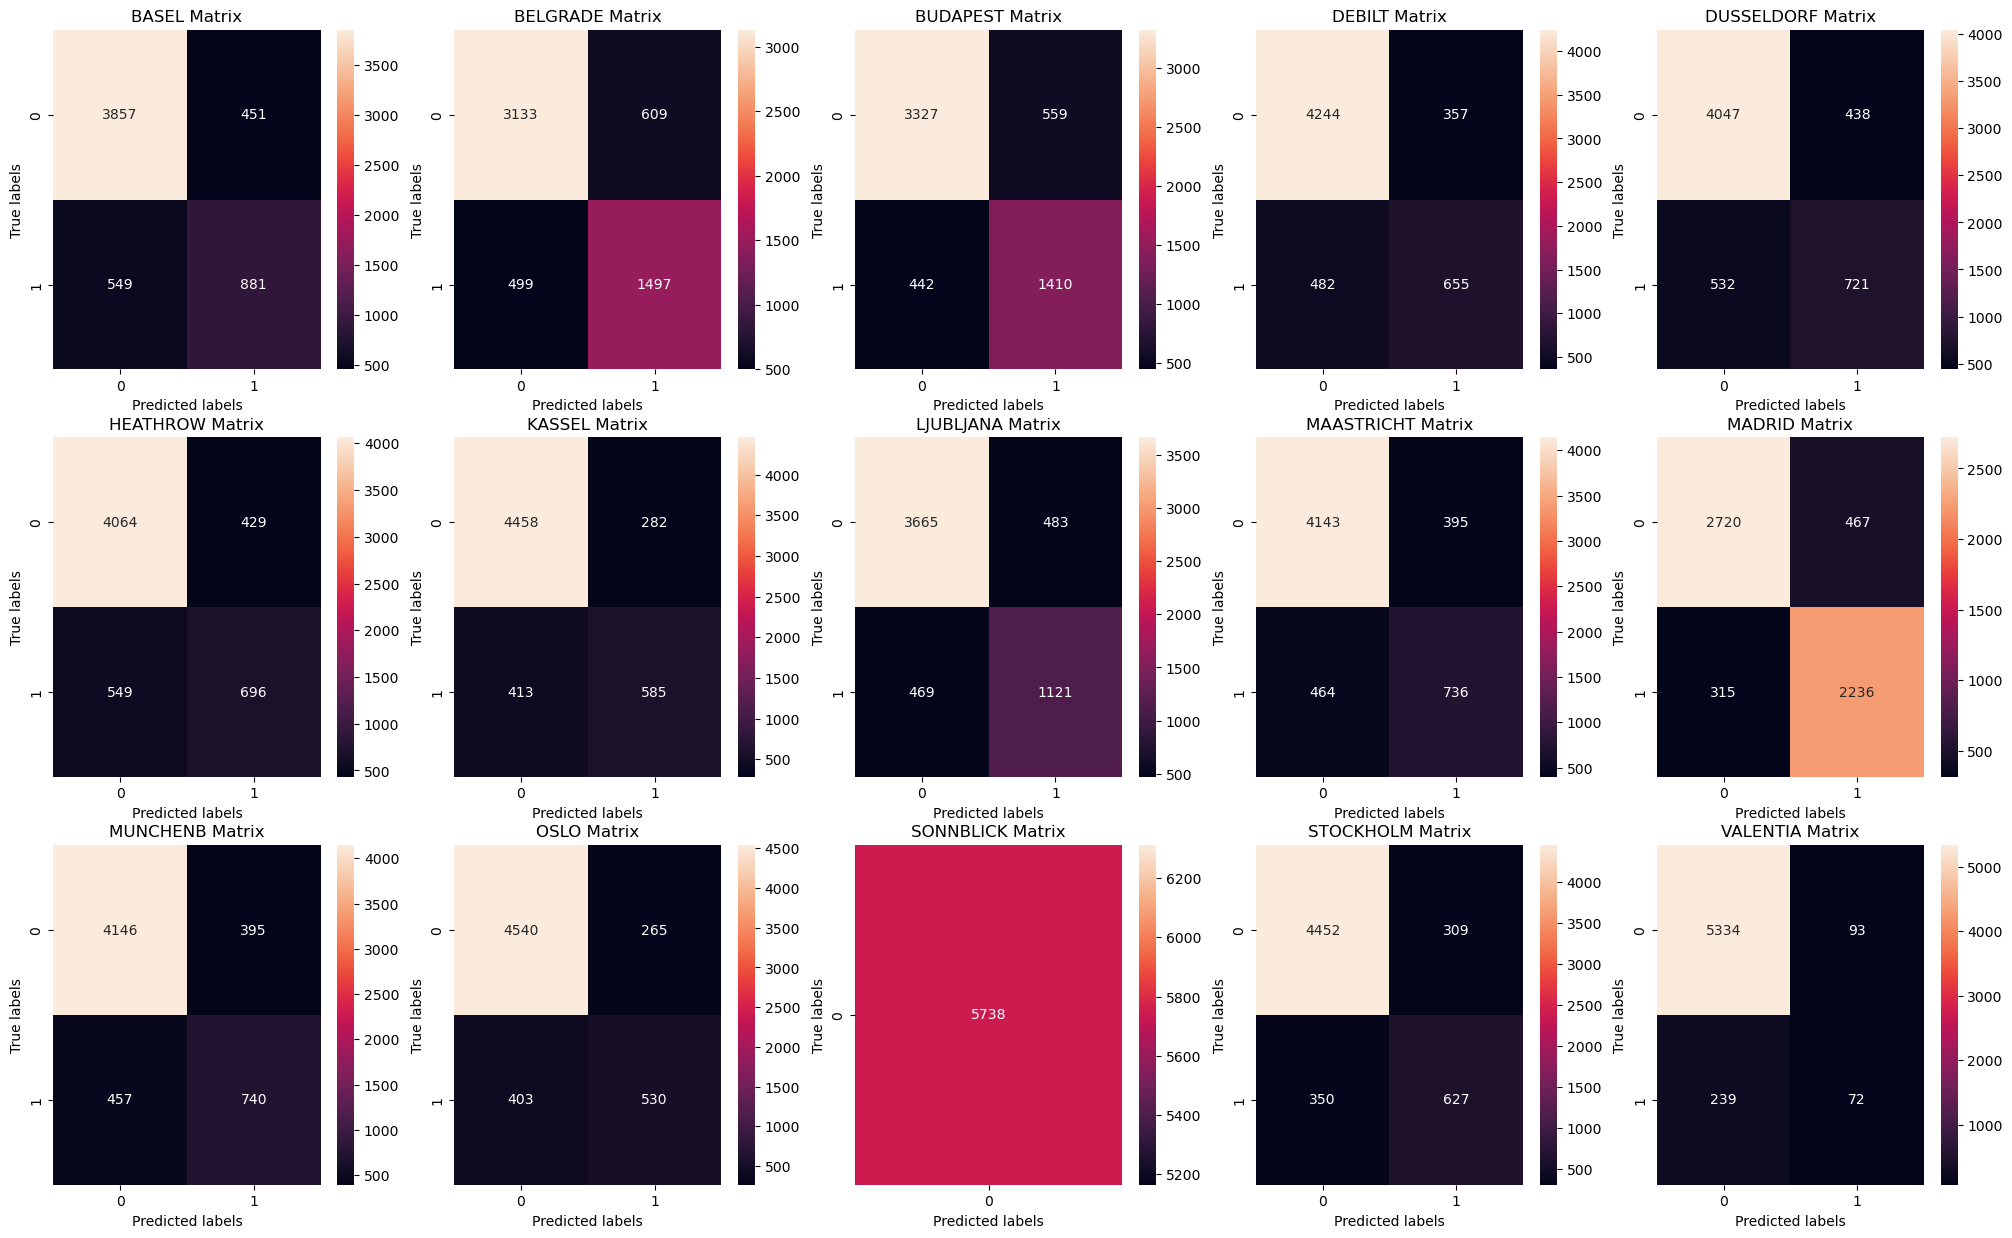

In [365]:
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1